In [10]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
sns.set_theme(style="darkgrid")

%load_ext autoreload
%autoreload 2

df = yf.download("SBIN.NS", start="2022-01-01", end="2023-04-30", interval="1d")
df

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,462.000000,472.000000,460.100006,470.799988,463.565521,13124509
2022-01-04,472.500000,484.700012,471.049988,483.500000,476.070374,23296671
2022-01-05,481.899994,495.000000,479.149994,492.399994,484.833618,24694169
2022-01-06,487.700012,494.399994,485.399994,491.700012,484.144409,18190843
2022-01-07,493.450012,501.950012,489.450012,491.250000,483.701294,22746330
...,...,...,...,...,...,...
2023-04-24,543.799988,555.549988,543.500000,554.599976,554.599976,23335611
2023-04-25,555.000000,567.900024,555.000000,561.799988,561.799988,38142390
2023-04-26,562.000000,567.000000,556.450012,566.349976,566.349976,23143882


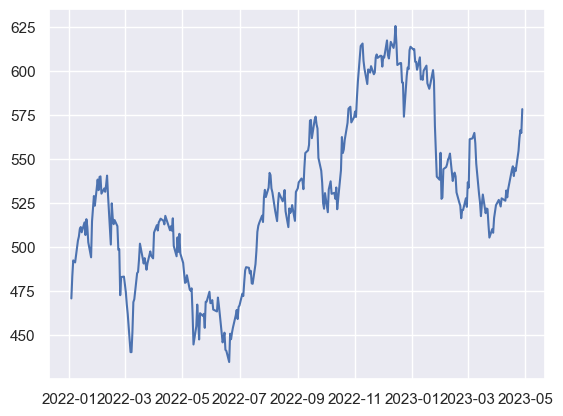

In [11]:
plt.plot(df['Close'])

In [4]:
# plot candlestick, make candlestick prettier
fig = go.Figure(data=[go.Candlestick(x=df.index, open=df['Open'], high=df['High'], low=df['Low'], close=df['Close'])])
fig

In [5]:
from ta_funcs import *

# go through each day and check if it is a bearish engulfing day
for i in range(2, len(df)):
    if bearish_engulfing(df.iloc[i-2:i+1]):
        print("Bearish engulfing day: ", df.index[i])

Bearish engulfing day:  2022-02-04 00:00:00
Bearish engulfing day:  2022-02-08 00:00:00
Bearish engulfing day:  2022-03-21 00:00:00
Bearish engulfing day:  2022-04-29 00:00:00
Bearish engulfing day:  2022-05-18 00:00:00
Bearish engulfing day:  2022-06-03 00:00:00
Bearish engulfing day:  2022-06-16 00:00:00
Bearish engulfing day:  2022-06-20 00:00:00
Bearish engulfing day:  2022-12-15 00:00:00
Bearish engulfing day:  2022-12-21 00:00:00
Bearish engulfing day:  2023-01-10 00:00:00
Bearish engulfing day:  2023-01-12 00:00:00
Bearish engulfing day:  2023-01-24 00:00:00
Bearish engulfing day:  2023-02-01 00:00:00
Bearish engulfing day:  2023-02-13 00:00:00
Bearish engulfing day:  2023-04-05 00:00:00
Bearish engulfing day:  2023-04-12 00:00:00


In [6]:
fig = go.Figure(data=[go.Candlestick(x=df.index, open=df['Open'], high=df['High'], low=df['Low'], close=df['Close'])])
for i in range(2, len(df)):
    if bearish_engulfing(df.iloc[i-2:i+1]):
        fig.add_vrect(
            x0=df.index[i-1], x1=df.index[i],
            fillcolor="LightSalmon", opacity=0.5,
            layer="below", line_width=0,
        )
        
# set title and axis labels
fig.update_layout(
    title="Bearish engulfing pattern",
    xaxis_title="Date",
    yaxis_title="Price",
)
fig

In [7]:
# make a slilce of the dataframe for the bearish engulfing day
dates = []
_df = df.reset_index()
for i in range(2, len(df)):
    if bearish_engulfing(df.iloc[i-2:i+1]):
        fig.add_vrect(
            x0=df.index[i-1], x1=df.index[i],
            fillcolor="LightSalmon", opacity=0.5,
            layer="below", line_width=0,
        )
        dates.append(i)

df[indices]

KeyError: "None of [Int64Index([23, 25, 52, 79, 91, 103, 112, 114, 236, 240, 254, 256, 264, 269,\n            277, 311, 315],\n           dtype='int64')] are in the [columns]"

In [28]:
fig = go.Figure(data=[go.Candlestick(x=df.index, open=df['Open'], high=df['High'], low=df['Low'], close=df['Close'])])
for i in range(2, len(df)):
    if bearish_engulfing(df.iloc[i-2:i+1]):
        fig.add_vrect(
            x0=df.index[i-1], x1=df.index[i],
            fillcolor="LightSalmon", opacity=0.5,
            layer="below", line_width=0,
        )
    if bullish_engulfing(df.iloc[i-2:i+1]):
        fig.add_vrect(
            x0=df.index[i-1], x1=df.index[i],
            fillcolor="LightGreen", opacity=0.5,
            layer="below", line_width=0,
        )
        
# set title and axis labels
fig.update_layout(
    title="Bearish/Bullish engulfing pattern",
    xaxis_title="Date",
    yaxis_title="Price",
)

fig

In [29]:
def display_pattern(df, pattern, name):
    for i in range(2, len(df)):
        if pattern(df.iloc[i-2:i+1]):
            print(f"{name} day: ", df.index[i])

    fig = go.Figure(data=[go.Candlestick(x=df.index, open=df['Open'], high=df['High'], low=df['Low'], close=df['Close'])])
    for i in range(2, len(df)):
        if pattern(df.iloc[i-2:i+1]):
            fig.add_vrect(
                x0=df.index[i-1], x1=df.index[i],
                fillcolor="LightSalmon", opacity=0.5,
                layer="below", line_width=0,
            )
            
    # set title and axis labels
    fig.update_layout(
        title= f"{name} pattern",
        xaxis_title="Date",
        yaxis_title="Price",
    )
    fig.show()

In [30]:
display_pattern(df, bullish_engulfing, "Bullish engulfing")

Bullish engulfing day:  2022-01-17 00:00:00
Bullish engulfing day:  2022-01-19 00:00:00
Bullish engulfing day:  2022-01-25 00:00:00
Bullish engulfing day:  2022-03-11 00:00:00
Bullish engulfing day:  2022-04-01 00:00:00
Bullish engulfing day:  2022-06-30 00:00:00
Bullish engulfing day:  2022-08-18 00:00:00
Bullish engulfing day:  2022-08-23 00:00:00
Bullish engulfing day:  2022-09-14 00:00:00
Bullish engulfing day:  2022-09-19 00:00:00
Bullish engulfing day:  2022-10-17 00:00:00
Bullish engulfing day:  2022-11-03 00:00:00
Bullish engulfing day:  2023-02-10 00:00:00


In [31]:
display_pattern(df, bearish_harami, "Bearish harami")

Bearish harami day:  2022-05-09 00:00:00
Bearish harami day:  2022-06-09 00:00:00
Bearish harami day:  2022-06-22 00:00:00
Bearish harami day:  2022-06-29 00:00:00
Bearish harami day:  2022-07-26 00:00:00
Bearish harami day:  2022-08-03 00:00:00
Bearish harami day:  2022-09-06 00:00:00
Bearish harami day:  2022-11-16 00:00:00
Bearish harami day:  2022-12-06 00:00:00
Bearish harami day:  2023-02-28 00:00:00
Bearish harami day:  2023-03-02 00:00:00
Bearish harami day:  2023-04-27 00:00:00


In [18]:
display_pattern(df, bullish_harami, "Bullish harami")

Bullish harami day:  2022-02-02 00:00:00
Bullish harami day:  2022-02-07 00:00:00
Bullish harami day:  2022-02-09 00:00:00
Bullish harami day:  2022-05-11 00:00:00
Bullish harami day:  2022-05-16 00:00:00
Bullish harami day:  2022-08-01 00:00:00
Bullish harami day:  2022-11-15 00:00:00
Bullish harami day:  2022-11-22 00:00:00
Bullish harami day:  2022-12-01 00:00:00
Bullish harami day:  2022-12-19 00:00:00
Bullish harami day:  2023-01-11 00:00:00
Bullish harami day:  2023-02-14 00:00:00
Bullish harami day:  2023-03-16 00:00:00
Bullish harami day:  2023-03-27 00:00:00
Bullish harami day:  2023-04-13 00:00:00
